In this notebook we would like demonstrate the impact of activity transformations on the COVID-19 multi-omic data in terms of batch effect and the joint differentially modulated drivers (differential activity versus differential abundance analysis)

# Dependencies

In [12]:
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24815 sha256=0568d94d334885f7c18af0b4a7a5b8b71ffacb90dbfff5711dcfcdf1d5750697
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


In [6]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/My Drive/"
project_folder = "APNet_input_data/PCA_plots"
os.chdir(root_dir + project_folder)
!pwd

Mounted at /content/drive
/content/drive/My Drive/APNet_input_data/PCA_plots


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from openpyxl import load_workbook

# PCA

In [3]:
# Combine datasets

# Expression data
# Load the data
mgh_counts = pd.read_csv("count_matrix_MGH.csv", index_col=0)
mayo_counts = pd.read_csv("count_matrix_Mayo.csv", index_col=0)
stanford_counts = pd.read_csv("count_matrix_Stanford.csv", index_col=0)
scmgh_counts = pd.read_excel("count_matrix_scMGH_pseudobulk.xlsx", index_col=0)

# Filter rows to include only those present in all datasets
common_rows = mgh_counts.index.intersection(mayo_counts.index).intersection(stanford_counts.index).intersection(scmgh_counts.index)

mgh_counts = mgh_counts.loc[common_rows]
mayo_counts = mayo_counts.loc[common_rows]
stanford_counts = stanford_counts.loc[common_rows]
scmgh_counts = scmgh_counts.loc[common_rows]

# Combine datasets
total_counts = pd.concat([mgh_counts, mayo_counts, stanford_counts, scmgh_counts], axis=1)

# Save combined count matrix to Excel
total_counts.to_excel("outputs/count_matrix.xlsx", index=True)


# Activity data
# Load activity data
mgh_activity = pd.read_csv("activity_matrix_MGH.csv", index_col=0)
mayo_activity = pd.read_csv("activity_matrix_Mayo.csv", index_col=0)
stanford_activity = pd.read_csv("activity_matrix_Stanford.csv", index_col=0)
scmgh_activity = pd.read_excel("activity_matrix_scMGH_pseudobulk.xlsx", index_col=0)

# Filter rows to include only those present in all datasets
common_rows_activity = mgh_activity.index.intersection(mayo_activity.index).intersection(stanford_activity.index).intersection(scmgh_activity.index)

mgh_activity = mgh_activity.loc[common_rows_activity]
mayo_activity = mayo_activity.loc[common_rows_activity]
stanford_activity = stanford_activity.loc[common_rows_activity]
scmgh_activity = scmgh_activity.loc[common_rows_activity]

# Combine datasets
total_activity = pd.concat([mgh_activity, mayo_activity, stanford_activity, scmgh_activity], axis=1)

# Save combined activity matrix to Excel
total_activity.to_excel("outputs/activity_matrix.xlsx", index=True)

# Load phenotype data
mgh_pheno = pd.read_csv("MGH_metadata.csv")
mgh_pheno['Batch'] = 'MGH'
mgh_pheno.columns = ['Samples', 'Status', 'Batch']

mayo_pheno = pd.read_csv("Mayo_metadata.csv")
mayo_pheno['Batch'] = 'MAYO'
mayo_pheno.columns = ['Samples', 'Status', 'Batch']

stanford_pheno = pd.read_csv("Stanford_metadata.csv")
stanford_pheno['Batch'] = 'STANFORD'
stanford_pheno.columns = ['Samples', 'Status', 'Batch']

scmgh_pheno = pd.read_csv("scMGH_metadata.csv")
scmgh_pheno['Batch'] = 'scMGH'
scmgh_pheno.columns = ['Samples', 'Status', 'Batch']

# Combine phenotype data
pheno = pd.concat([mgh_pheno, mayo_pheno, stanford_pheno, scmgh_pheno], axis=0)

# Save combined phenotype data to Excel
pheno.to_excel("outputs/metadata.xlsx", index=False)

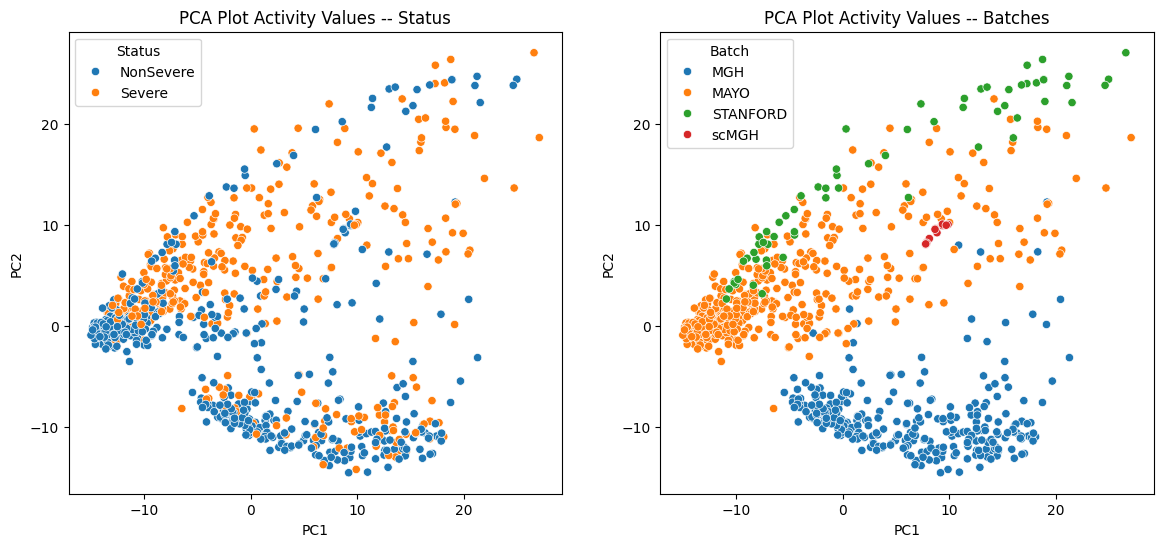

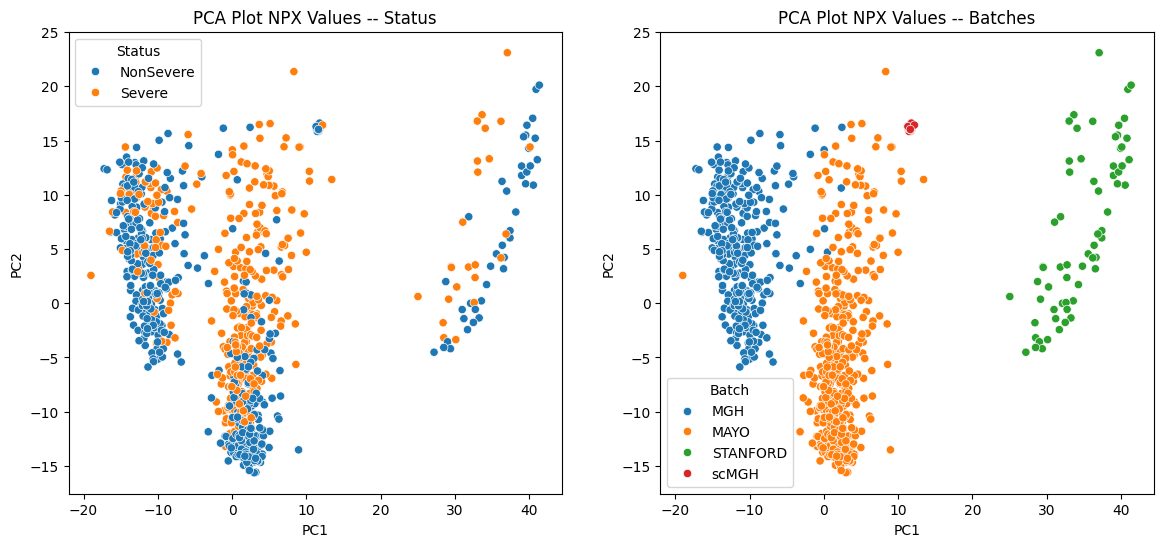

In [4]:
# Plotting

# Load combined data
metadata = pd.read_excel("outputs/metadata.xlsx")
activity = pd.read_excel("outputs/activity_matrix.xlsx", index_col=0)
expression = pd.read_excel("outputs/count_matrix.xlsx", index_col=0)

# Perform PCA on activity data
scaled_activity = (activity - activity.mean()) / activity.std()
pca_activity = PCA(n_components=2)
pc_scores_activity = pca_activity.fit_transform(scaled_activity.T)

combined_data_activity = pd.DataFrame(pc_scores_activity, columns=['PC1', 'PC2'])
combined_data_activity = pd.concat([combined_data_activity, metadata], axis=1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=combined_data_activity, x='PC1', y='PC2', hue='Status')
plt.title('PCA Plot Activity Values -- Status')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
sns.scatterplot(data=combined_data_activity, x='PC1', y='PC2', hue='Batch')
plt.title('PCA Plot Activity Values -- Batches')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

# Perform PCA on expression data
scaled_expression = (expression - expression.mean()) / expression.std()
pca_expression = PCA(n_components=2)
pc_scores_expression = pca_expression.fit_transform(scaled_expression.T)

combined_data_expression = pd.DataFrame(pc_scores_expression, columns=['PC1', 'PC2'])
combined_data_expression = pd.concat([combined_data_expression, metadata], axis=1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=combined_data_expression, x='PC1', y='PC2', hue='Status')
plt.title('PCA Plot NPX Values -- Status')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
sns.scatterplot(data=combined_data_expression, x='PC1', y='PC2', hue='Batch')
plt.title('PCA Plot NPX Values -- Batches')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

# Upset plots

Bulk MGH proteom.+  Bulk Mayo proteom.+  Bulk Stanford proteom.+  Bulk MGH proteom.-  Bulk Mayo proteom.-  Bulk Stanford proteom.-
0                   0                    0                        1                   1                    0                          214
                                                                                                           1                          183
1                   1                    1                        0                   0                    0                          150
0                   0                    0                        0                   1                    0                          150
1                   1                    0                        0                   0                    0                          137
0                   1                    0                        0                   0                    0                          129
                    0                    

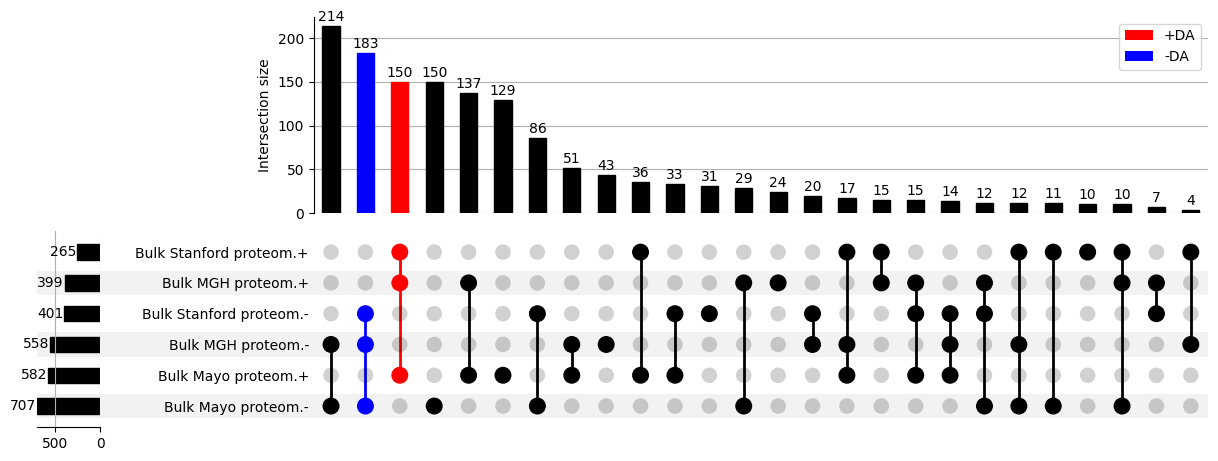

In [13]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt

# Define file paths
da_file_paths = {
    'MGH+': 'Venn_plotting/Venn_data_DA/MGH+.txt',
    'Mayo+': 'Venn_plotting/Venn_data_DA/Mayo+.txt',
    'Stanford+': 'Venn_plotting/Venn_data_DA/Stanford+.txt',
    'MGH-': 'Venn_plotting/Venn_data_DA/MGH-.txt',
    'Mayo-': 'Venn_plotting/Venn_data_DA/Mayo-.txt',
    'Stanford-': 'Venn_plotting/Venn_data_DA/Stanford-.txt'
}

# Load data into DataFrames and remove the first row
data_frames = {key: pd.read_csv(file, header=None, names=['Protein']).drop(0).reset_index(drop=True) for key, file in da_file_paths.items()}

# Combine the data into a single DataFrame
all_proteins = pd.concat(data_frames.values()).drop_duplicates().reset_index(drop=True)
combined_df = pd.DataFrame(all_proteins, columns=['Protein'])

# Create columns indicating presence in each dataset
combined_df['Bulk MGH proteom.+'] = combined_df['Protein'].isin(data_frames['MGH+']['Protein']).astype(int)
combined_df['Bulk Mayo proteom.+'] = combined_df['Protein'].isin(data_frames['Mayo+']['Protein']).astype(int)
combined_df['Bulk Stanford proteom.+'] = combined_df['Protein'].isin(data_frames['Stanford+']['Protein']).astype(int)
combined_df['Bulk MGH proteom.-'] = combined_df['Protein'].isin(data_frames['MGH-']['Protein']).astype(int)
combined_df['Bulk Mayo proteom.-'] = combined_df['Protein'].isin(data_frames['Mayo-']['Protein']).astype(int)
combined_df['Bulk Stanford proteom.-'] = combined_df['Protein'].isin(data_frames['Stanford-']['Protein']).astype(int)

# Transform into a multi-index Series suitable for UpSet plot
data = combined_df.set_index([
    'Bulk MGH proteom.+',
    'Bulk Mayo proteom.+',
    'Bulk Stanford proteom.+',
    'Bulk MGH proteom.-',
    'Bulk Mayo proteom.-',
    'Bulk Stanford proteom.-'
]).index.value_counts()

# Print the data
print(data)

# Create the UpSet plot object
upset = UpSet(data, sort_by="cardinality", show_counts="{:,}")

# Style subsets that include all three positive datasets
upset.style_subsets(present=['Bulk MGH proteom.+', 'Bulk Mayo proteom.+', 'Bulk Stanford proteom.+'], facecolor="red", label="+DA")
upset.style_subsets(present=['Bulk MGH proteom.-', 'Bulk Mayo proteom.-', 'Bulk Stanford proteom.-'], facecolor="blue", label="-DA")

# Plot the UpSet plot with styled subsets and legend
upset.plot()
#plt.suptitle("Protein Presence Across Multiple Datasets; Show a Legend")
plt.savefig('Upset_bulk_activity.png', format='png', dpi=300)
plt.show()

Bulk MGH proteom.+  Bulk Mayo proteom.+  Bulk Stanford proteom.+  Bulk MGH proteom.-  Bulk Mayo proteom.-  Bulk Stanford proteom.-
0                   1                    0                        0                   0                    0                          237
                    0                    0                        0                   1                    0                          229
                                                                  1                   1                    0                          170
                                                                  0                   1                    1                          120
1                   1                    0                        0                   0                    0                          101
0                   0                    0                        1                   1                    1                           97
1                   1                    

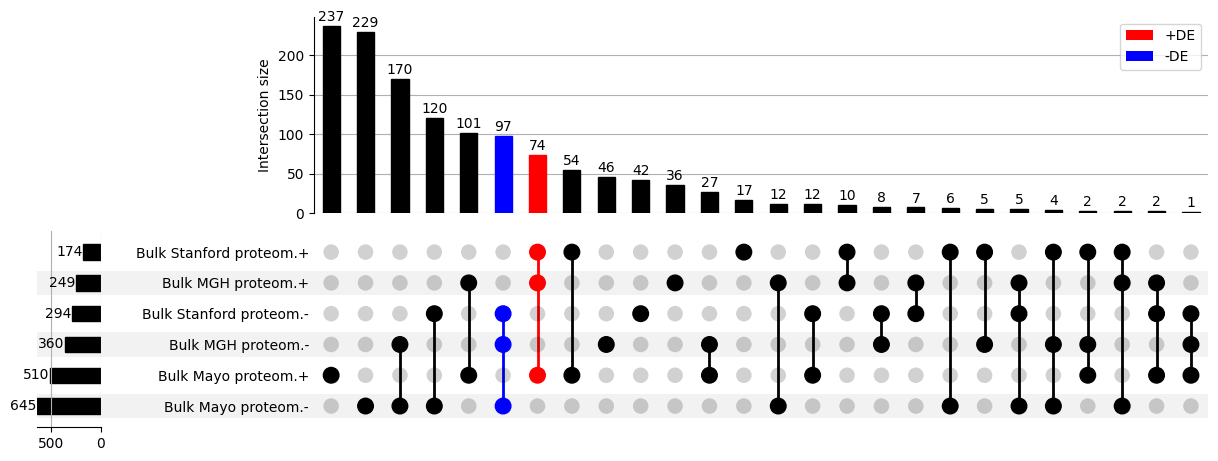

In [14]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt

# Define file paths
da_file_paths = {
    'MGH+': 'Venn_plotting/Venn_data_DE/MGH+.txt',
    'Mayo+': 'Venn_plotting/Venn_data_DE/Mayo+.txt',
    'Stanford+': 'Venn_plotting/Venn_data_DE/Stanford+.txt',
    'MGH-': 'Venn_plotting/Venn_data_DE/MGH-.txt',
    'Mayo-': 'Venn_plotting/Venn_data_DE/Mayo-.txt',
    'Stanford-': 'Venn_plotting/Venn_data_DE/Stanford-.txt'
}

# Load data into DataFrames and remove the first row
data_frames = {key: pd.read_csv(file, header=None, names=['Protein']).drop(0).reset_index(drop=True) for key, file in da_file_paths.items()}

# Combine the data into a single DataFrame
all_proteins = pd.concat(data_frames.values()).drop_duplicates().reset_index(drop=True)
combined_df = pd.DataFrame(all_proteins, columns=['Protein'])

# Create columns indicating presence in each dataset
combined_df['Bulk MGH proteom.+'] = combined_df['Protein'].isin(data_frames['MGH+']['Protein']).astype(int)
combined_df['Bulk Mayo proteom.+'] = combined_df['Protein'].isin(data_frames['Mayo+']['Protein']).astype(int)
combined_df['Bulk Stanford proteom.+'] = combined_df['Protein'].isin(data_frames['Stanford+']['Protein']).astype(int)
combined_df['Bulk MGH proteom.-'] = combined_df['Protein'].isin(data_frames['MGH-']['Protein']).astype(int)
combined_df['Bulk Mayo proteom.-'] = combined_df['Protein'].isin(data_frames['Mayo-']['Protein']).astype(int)
combined_df['Bulk Stanford proteom.-'] = combined_df['Protein'].isin(data_frames['Stanford-']['Protein']).astype(int)

# Transform into a multi-index Series suitable for UpSet plot
data = combined_df.set_index([
    'Bulk MGH proteom.+',
    'Bulk Mayo proteom.+',
    'Bulk Stanford proteom.+',
    'Bulk MGH proteom.-',
    'Bulk Mayo proteom.-',
    'Bulk Stanford proteom.-'
]).index.value_counts()

# Print the data
print(data)

# Create the UpSet plot object
upset = UpSet(data, sort_by="cardinality", show_counts="{:,}")

# Style subsets that include all three positive datasets
upset.style_subsets(present=['Bulk MGH proteom.+', 'Bulk Mayo proteom.+', 'Bulk Stanford proteom.+'], facecolor="red", label="+DE")
upset.style_subsets(present=['Bulk MGH proteom.-', 'Bulk Mayo proteom.-', 'Bulk Stanford proteom.-'], facecolor="blue", label="-DE")

# Plot the UpSet plot with styled subsets and legend
upset.plot()
#plt.suptitle("Protein Presence Across Multiple Datasets; Show a Legend")
plt.savefig('Upset_bulk_expression.png', format='png', dpi=300)
plt.show()

Single Cell MGH+  Bulk MGH for sc+  Bulk MGH for sc-  Single Cell MGH-
1                 0                 0                 0                   8601
0                 0                 0                 1                   3187
1                 1                 0                 0                    150
0                 0                 1                 1                    132
Name: count, dtype: int64


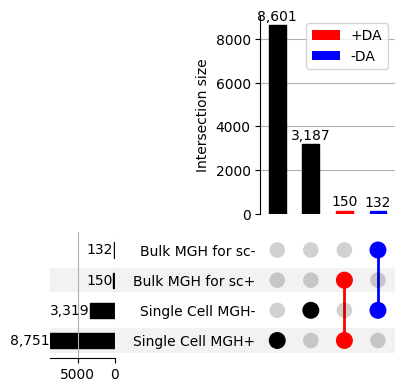

In [15]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt

# Define file paths
da_file_paths = {
    'single_cell_MGH+': 'Venn_plotting/Venn_data_DA/scMGH+.txt',
    'bulk_MGH_for_sc+': 'Venn_plotting/Venn_data_DA/common+.txt',
    'bulk_MGH_for_sc-': 'Venn_plotting/Venn_data_DA/common-.txt',
    'single_cell_MGH-': 'Venn_plotting/Venn_data_DA/scMGH-.txt',
}

# Load data into DataFrames and remove the first row
data_frames = {key: pd.read_csv(file, header=None, names=['Protein']).drop(0).reset_index(drop=True) for key, file in da_file_paths.items()}

# Combine the data into a single DataFrame
all_proteins = pd.concat(data_frames.values()).drop_duplicates().reset_index(drop=True)
combined_df = pd.DataFrame(all_proteins, columns=['Protein'])

# Create columns indicating presence in each dataset
combined_df['Single Cell MGH+'] = combined_df['Protein'].isin(data_frames['single_cell_MGH+']['Protein']).astype(int)
combined_df['Bulk MGH for sc+'] = combined_df['Protein'].isin(data_frames['bulk_MGH_for_sc+']['Protein']).astype(int)
combined_df['Bulk MGH for sc-'] = combined_df['Protein'].isin(data_frames['bulk_MGH_for_sc-']['Protein']).astype(int)
combined_df['Single Cell MGH-'] = combined_df['Protein'].isin(data_frames['single_cell_MGH-']['Protein']).astype(int)

# Transform into a multi-index Series suitable for UpSet plot
data = combined_df.set_index([
    'Single Cell MGH+',
    'Bulk MGH for sc+',
    'Bulk MGH for sc-',
    'Single Cell MGH-'
]).index.value_counts()

# Print the data
print(data)

# Create the UpSet plot object
upset = UpSet(data, sort_by="cardinality", show_counts="{:,}")

# Style subsets that include all three positive datasets
upset.style_subsets(present=['Single Cell MGH+', 'Bulk MGH for sc+'], facecolor="red", label="+DA")
upset.style_subsets(present=['Single Cell MGH-', 'Bulk MGH for sc-'], facecolor="blue", label="-DA")

# Plot the UpSet plot with styled subsets and legend
upset.plot()
plt.savefig('Upset_sc_activity.png', format='png', dpi=300)
plt.show()

Single Cell MGH+  Bulk MGH for sc+  Bulk MGH for sc-  Single Cell MGH-
0                 0                 0                 1                   4502
1                 0                 0                 0                    154
0                 0                 1                 1                    106
1                 1                 0                 0                      5
Name: count, dtype: int64


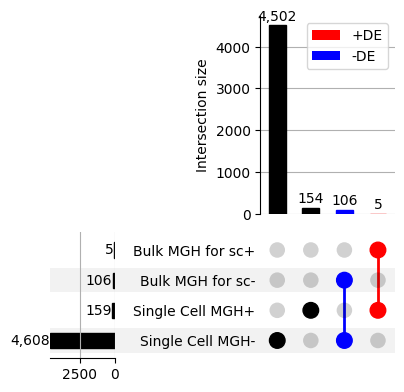

In [16]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt

# Define file paths
da_file_paths = {
    'single_cell_MGH+': 'Venn_plotting/Venn_data_DE/scMGH+_DE.txt',
    'bulk_MGH_for_sc+': 'Venn_plotting/Venn_data_DE/common_DE+.txt',
    'bulk_MGH_for_sc-': 'Venn_plotting/Venn_data_DE/common_DE-.txt',
    'single_cell_MGH-': 'Venn_plotting/Venn_data_DE/scMGH-_DE.txt',
}

# Load data into DataFrames and remove the first row
data_frames = {key: pd.read_csv(file, header=None, names=['Protein']).drop(0).reset_index(drop=True) for key, file in da_file_paths.items()}

# Combine the data into a single DataFrame
all_proteins = pd.concat(data_frames.values()).drop_duplicates().reset_index(drop=True)
combined_df = pd.DataFrame(all_proteins, columns=['Protein'])

# Create columns indicating presence in each dataset
combined_df['Single Cell MGH+'] = combined_df['Protein'].isin(data_frames['single_cell_MGH+']['Protein']).astype(int)
combined_df['Bulk MGH for sc+'] = combined_df['Protein'].isin(data_frames['bulk_MGH_for_sc+']['Protein']).astype(int)
combined_df['Bulk MGH for sc-'] = combined_df['Protein'].isin(data_frames['bulk_MGH_for_sc-']['Protein']).astype(int)
combined_df['Single Cell MGH-'] = combined_df['Protein'].isin(data_frames['single_cell_MGH-']['Protein']).astype(int)

# Transform into a multi-index Series suitable for UpSet plot
data = combined_df.set_index([
    'Single Cell MGH+',
    'Bulk MGH for sc+',
    'Bulk MGH for sc-',
    'Single Cell MGH-'
]).index.value_counts()

# Print the data
print(data)

# Create the UpSet plot object
upset = UpSet(data, sort_by="cardinality", show_counts="{:,}")

# Style subsets that include all three positive datasets
upset.style_subsets(present=['Single Cell MGH+', 'Bulk MGH for sc+'], facecolor="red", label="+DE")
upset.style_subsets(present=['Single Cell MGH-', 'Bulk MGH for sc-'], facecolor="blue", label="-DE")

# Plot the UpSet plot with styled subsets and legend
upset.plot()
plt.savefig('Upset_sc_expression.png', format='png', dpi=300)
plt.show()

# Multipanel

In [10]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/My Drive/"
project_folder = "APNet_input_data"
os.chdir(root_dir + project_folder)
!pwd

Mounted at /content/drive
/content/drive/My Drive/APNet_input_data


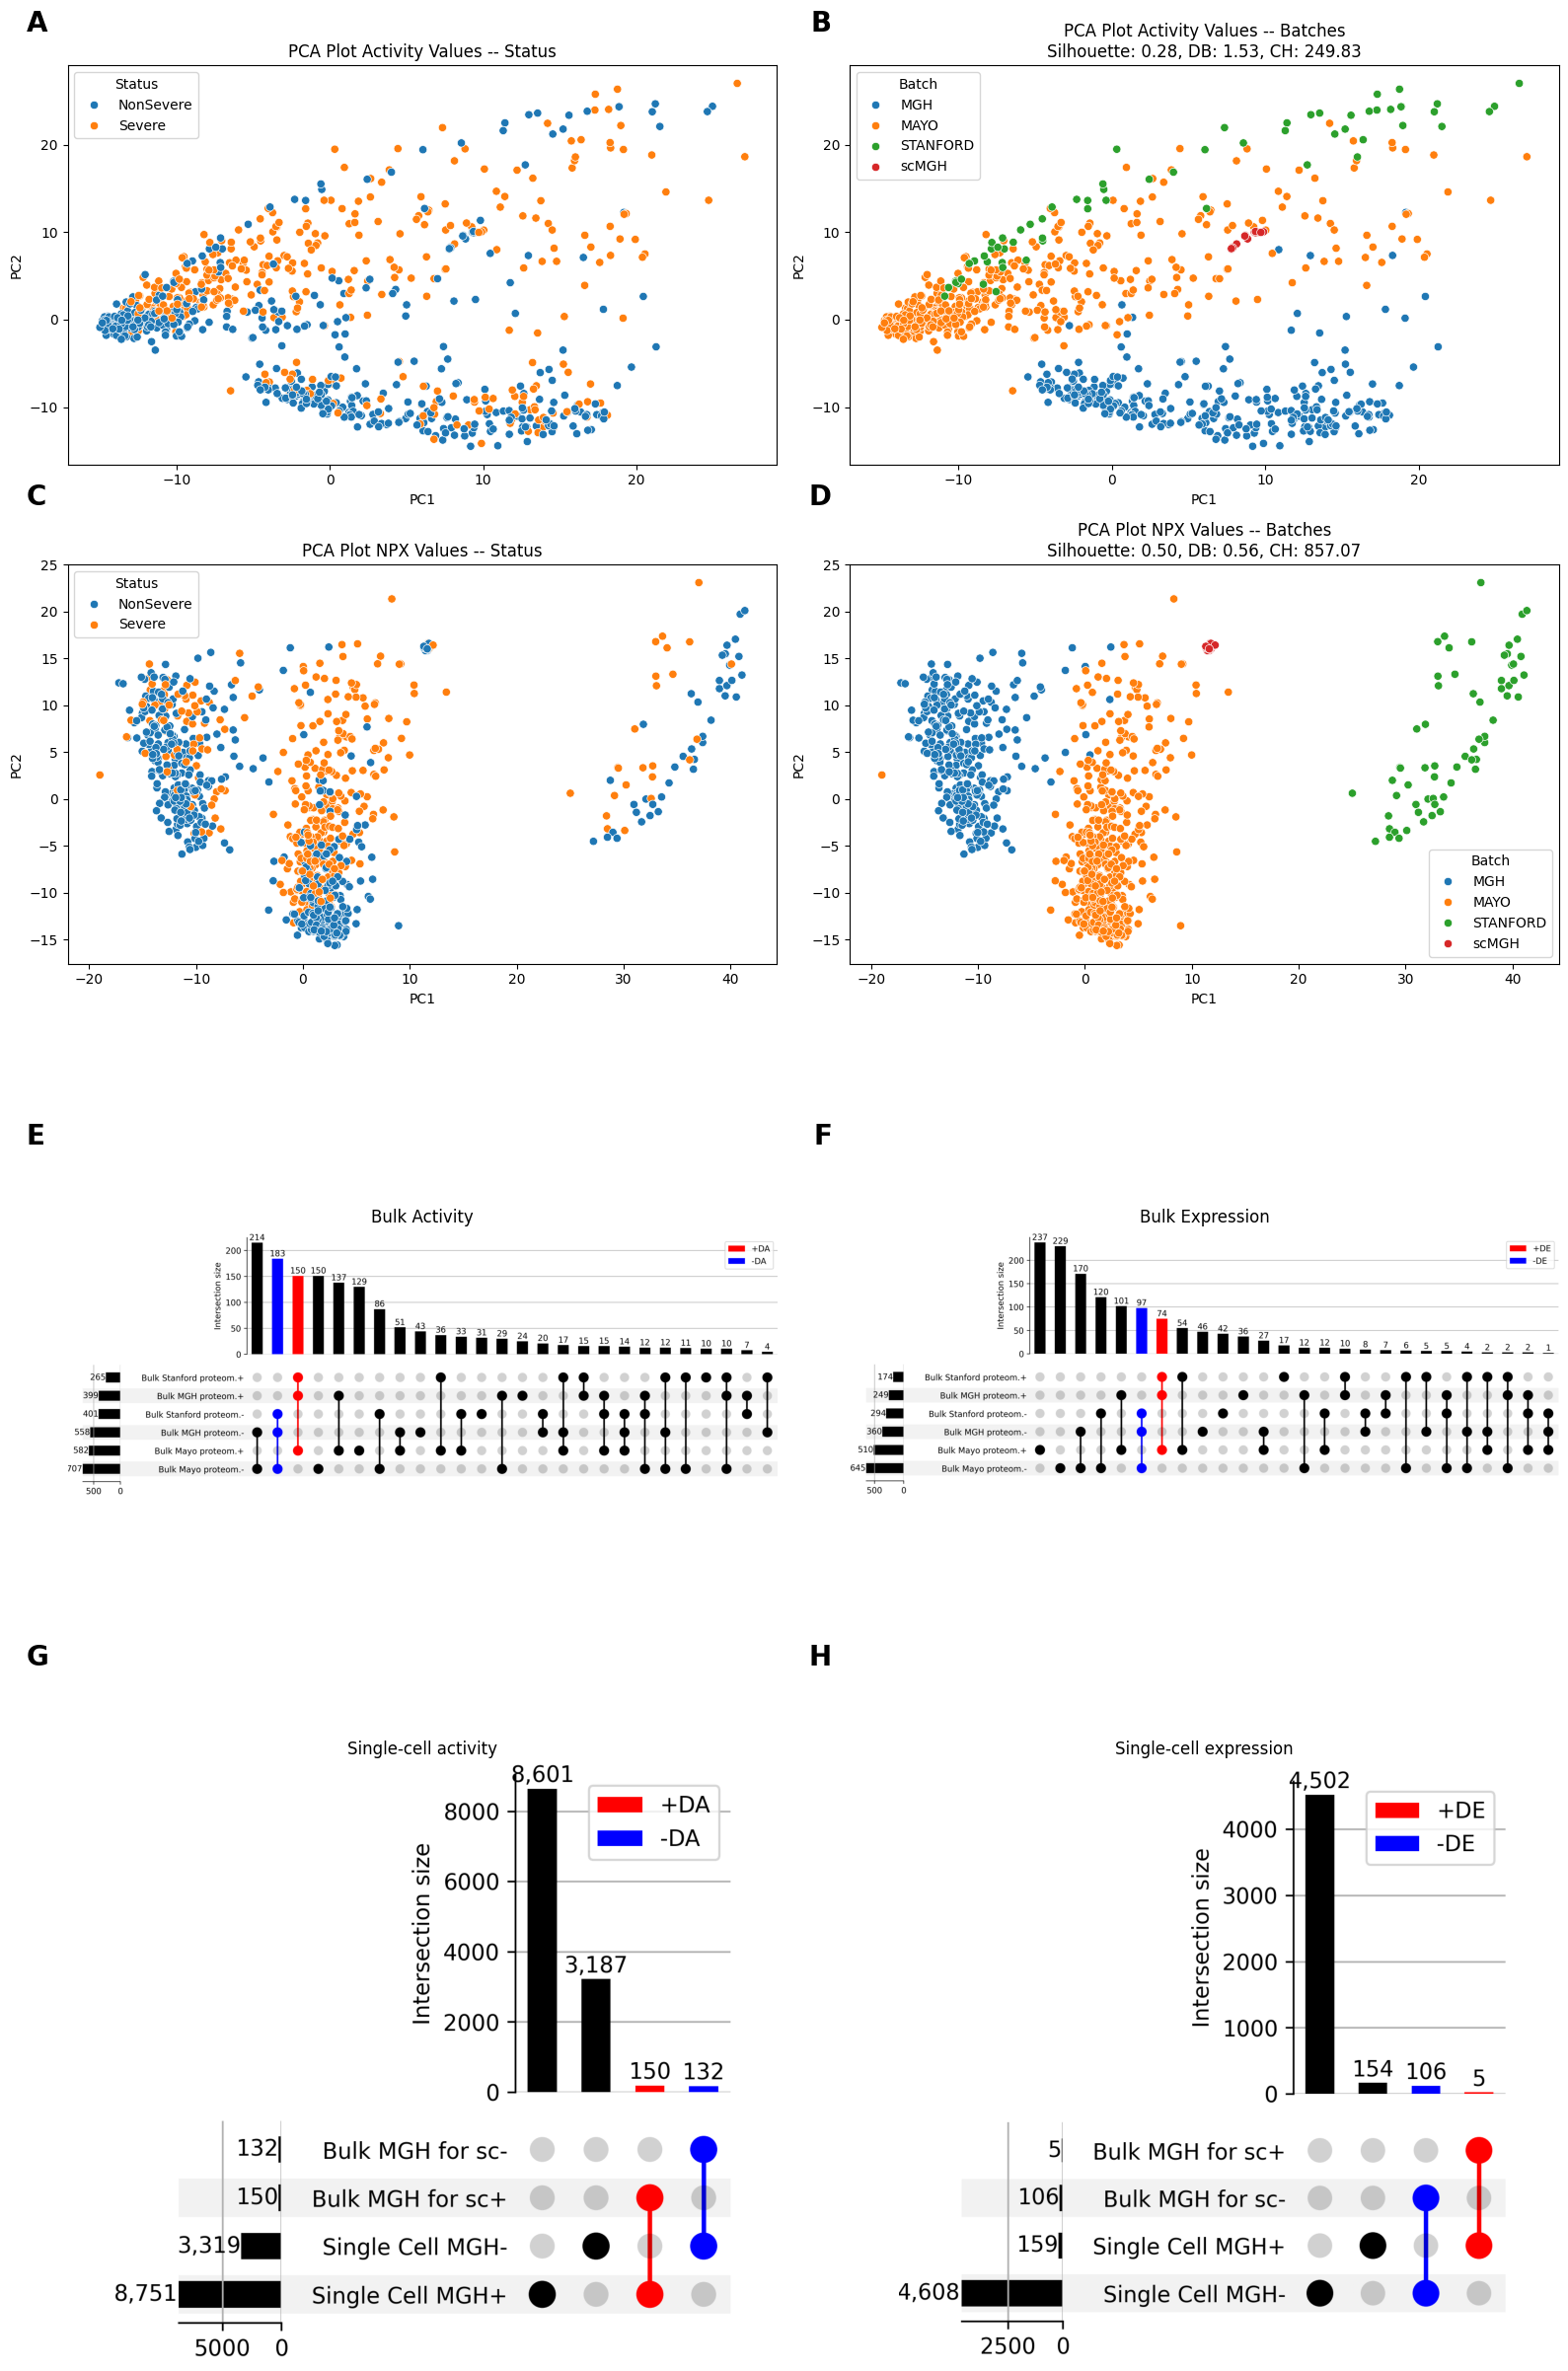

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming combined_data_activity, combined_data_expression, and metadata are already defined.

# Function to calculate clustering metrics
def calculate_clustering_metrics(data, labels):
    sil_score = silhouette_score(data, labels)
    db_score = davies_bouldin_score(data, labels)
    ch_score = calinski_harabasz_score(data, labels)
    return sil_score, db_score, ch_score

# Calculate metrics for activity data grouped by batch
activity_data = combined_data_activity[['PC1', 'PC2']].values
activity_labels_batch = combined_data_activity['Batch'].values
sil_score_activity_batch, db_score_activity_batch, ch_score_activity_batch = calculate_clustering_metrics(activity_data, activity_labels_batch)

# Calculate metrics for expression data grouped by batch
expression_data = combined_data_expression[['PC1', 'PC2']].values
expression_labels_batch = combined_data_expression['Batch'].values
sil_score_expression_batch, db_score_expression_batch, ch_score_expression_batch = calculate_clustering_metrics(expression_data, expression_labels_batch)

# Create a figure with 4 subplots in the first row, 1 in the second, and 1 in the third
fig = plt.figure(figsize=(16, 24))

# Adjust the grid to allocate more space for the images
gs = fig.add_gridspec(4, 2, height_ratios=[1, 1, 1.5, 1.5])

# First row with 4 subplots (A-D)
ax1 = fig.add_subplot(gs[0, 0])
sns.scatterplot(data=combined_data_activity, x='PC1', y='PC2', hue='Status', ax=ax1)
ax1.set_title('PCA Plot Activity Values -- Status')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

ax2 = fig.add_subplot(gs[0, 1])
sns.scatterplot(data=combined_data_activity, x='PC1', y='PC2', hue='Batch', ax=ax2)
ax2.set_title(f'PCA Plot Activity Values -- Batches\nSilhouette: {sil_score_activity_batch:.2f}, DB: {db_score_activity_batch:.2f}, CH: {ch_score_activity_batch:.2f}')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')

ax3 = fig.add_subplot(gs[1, 0])
sns.scatterplot(data=combined_data_expression, x='PC1', y='PC2', hue='Status', ax=ax3)
ax3.set_title('PCA Plot NPX Values -- Status')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')

ax4 = fig.add_subplot(gs[1, 1])
sns.scatterplot(data=combined_data_expression, x='PC1', y='PC2', hue='Batch', ax=ax4)
ax4.set_title(f'PCA Plot NPX Values -- Batches\nSilhouette: {sil_score_expression_batch:.2f}, DB: {db_score_expression_batch:.2f}, CH: {ch_score_expression_batch:.2f}')
ax4.set_xlabel('PC1')
ax4.set_ylabel('PC2')

# Load and plot PNG image for the bulk upset plot
img_bulk_upset = plt.imread('Upset_bulk_activity2.png')
ax5 = fig.add_subplot(gs[2, 0])
ax5.imshow(img_bulk_upset)
ax5.axis('off')
ax5.set_title('Bulk Activity')

# Load and plot PNG image for the second upset plot
img_second_upset = plt.imread('Upset_bulk_expression2.png')
ax6 = fig.add_subplot(gs[2, 1])
ax6.imshow(img_second_upset)
ax6.axis('off')
ax6.set_title('Bulk Expression')

# Load and plot PNG image for the new plot
img_new_plot_1 = plt.imread('Upset_sc_activity2.png')
ax7 = fig.add_subplot(gs[3, 0])
ax7.imshow(img_new_plot_1)
ax7.axis('off')
ax7.set_title('Single-cell activity')

# Load and plot PNG image for the new plot
img_new_plot_2 = plt.imread('Upset_sc_expression2.png')
ax8 = fig.add_subplot(gs[3, 1])
ax8.imshow(img_new_plot_2)
ax8.axis('off')
ax8.set_title('Single-cell expression')

# Add free text annotations
fig.text(0.02, 0.99, 'A', size=20, weight='bold', ha='left')
fig.text(0.53, 0.99, 'B', size=20, weight='bold', ha='right')
fig.text(0.02, 0.79, 'C', size=20, weight='bold', ha='left')
fig.text(0.53, 0.79, 'D', size=20, weight='bold', ha='right')
fig.text(0.02, 0.52, 'E', size=20, weight='bold', ha='left')
fig.text(0.53, 0.52, 'F', size=20, weight='bold', ha='right')
fig.text(0.02, 0.30, 'G', size=20, weight='bold', ha='left')
fig.text(0.53, 0.30, 'H', size=20, weight='bold', ha='right')

plt.tight_layout()
plt.savefig('Main_preprocessing.png', format='png', dpi=300)
plt.show()